# Modelos Lineales

De manera general, es posible representar el modelo lineal de la forma

$$
y_{i}|x_{i} \overset{iid}{\sim} N \left( x_{i}^{\prime} \beta , \sigma^{2} \right), \; i = 1, \dots, n
$$

con $x_{i}^{\prime} = \left( 1,x_{1i}, \dots , x_{i,p-1} \right)$

En ese orden de ideas, se observa que las covariables pueden presentar diferentes características; pueden ser continuas o categóricas. Según eso, la interpretación del modelo varía. En el primer caso, cuando se tiene variables de tipo continuo, el objetivo de los modelos es, generalmente, predictivo. En el caso de las variables categóricas se tratan objetivos  de comparación de grupos.

El ejemplo de las _Islas Galápagos_ sirve para ilustrar el primer caso:

In [1]:
install.packages('faraway')

package 'faraway' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\obrb1\AppData\Local\Temp\RtmpklLpkn\downloaded_packages


In [78]:
library(faraway)
data(gala)
head(gala)

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Baltra,58,23,25.09,346,0.6,0.6,1.84
Bartolome,31,21,1.24,109,0.6,26.3,572.33
Caldwell,3,3,0.21,114,2.8,58.7,0.78
Champion,25,9,0.10,46,1.9,47.4,0.18
Coamano,2,1,0.05,77,1.9,1.9,903.82
Daphne.Major,18,11,0.34,119,8.0,8.0,1.84


Parte del proceso exploratorio consiste en analizar gráficamente las variables, además de otras pruebas que pueden implementarse:

In [79]:
summary(gala)

    Species          Endemics          Area            Elevation      
 Min.   :  2.00   Min.   : 0.00   Min.   :   0.010   Min.   :  25.00  
 1st Qu.: 13.00   1st Qu.: 7.25   1st Qu.:   0.258   1st Qu.:  97.75  
 Median : 42.00   Median :18.00   Median :   2.590   Median : 192.00  
 Mean   : 85.23   Mean   :26.10   Mean   : 261.709   Mean   : 368.03  
 3rd Qu.: 96.00   3rd Qu.:32.25   3rd Qu.:  59.237   3rd Qu.: 435.25  
 Max.   :444.00   Max.   :95.00   Max.   :4669.320   Max.   :1707.00  
    Nearest          Scruz           Adjacent      
 Min.   : 0.20   Min.   :  0.00   Min.   :   0.03  
 1st Qu.: 0.80   1st Qu.: 11.03   1st Qu.:   0.52  
 Median : 3.05   Median : 46.65   Median :   2.59  
 Mean   :10.06   Mean   : 56.98   Mean   : 261.10  
 3rd Qu.:10.03   3rd Qu.: 81.08   3rd Qu.:  59.24  
 Max.   :47.40   Max.   :290.20   Max.   :4669.32  

In [80]:
round(cor(gala),4)

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
Species,1.0000,0.9709,0.6178,0.7385,-0.0141,-0.1711,0.0262
Endemics,0.9709,1.0000,0.6170,0.7929,0.0060,-0.1543,0.0827
Area,0.6178,0.6170,1.0000,0.7537,-0.1111,-0.1008,0.1800
Elevation,0.7385,0.7929,0.7537,1.0000,-0.0111,-0.0154,0.5365
Nearest,-0.0141,0.0060,-0.1111,-0.0111,1.0000,0.6154,-0.1162
Scruz,-0.1711,-0.1543,-0.1008,-0.0154,0.6154,1.0000,0.0517
Adjacent,0.0262,0.0827,0.1800,0.5365,-0.1162,0.0517,1.0000


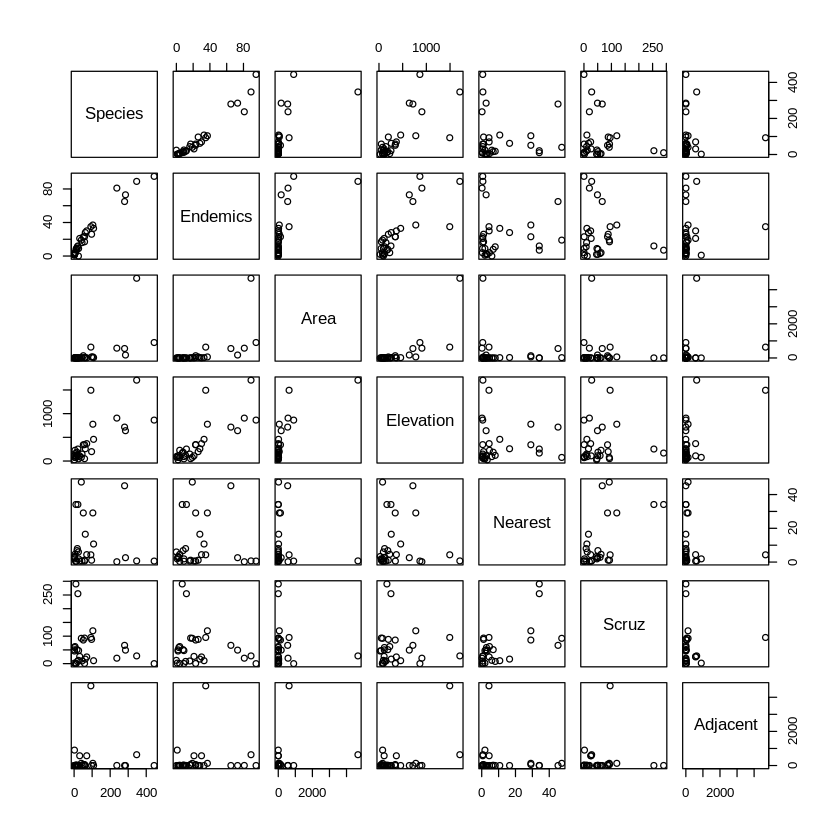

In [81]:
plot(gala)

En la sesión anterior se había ajustado un modelo inicial donde la variable `Species` se definía como dependiente de la variable `Endemics`:

In [82]:
fit<-lm(Species~Endemics, data = gala)
sumary(fit)

            Estimate Std. Error t value  Pr(>|t|)
(Intercept) -21.0480     7.1138 -2.9588  0.006219
Endemics      4.0721     0.1899 21.4433 < 2.2e-16

n = 30, p = 2, Residual SE = 27.94996, R-Squared = 0.94


Para el modelo, los Intervalos de Confianza son:

In [83]:
confint(fit)

,2.5 %,97.5 %
(Intercept),-35.61993,-6.476108
Endemics,3.68309,4.461075


Cuya representación gráfica es:

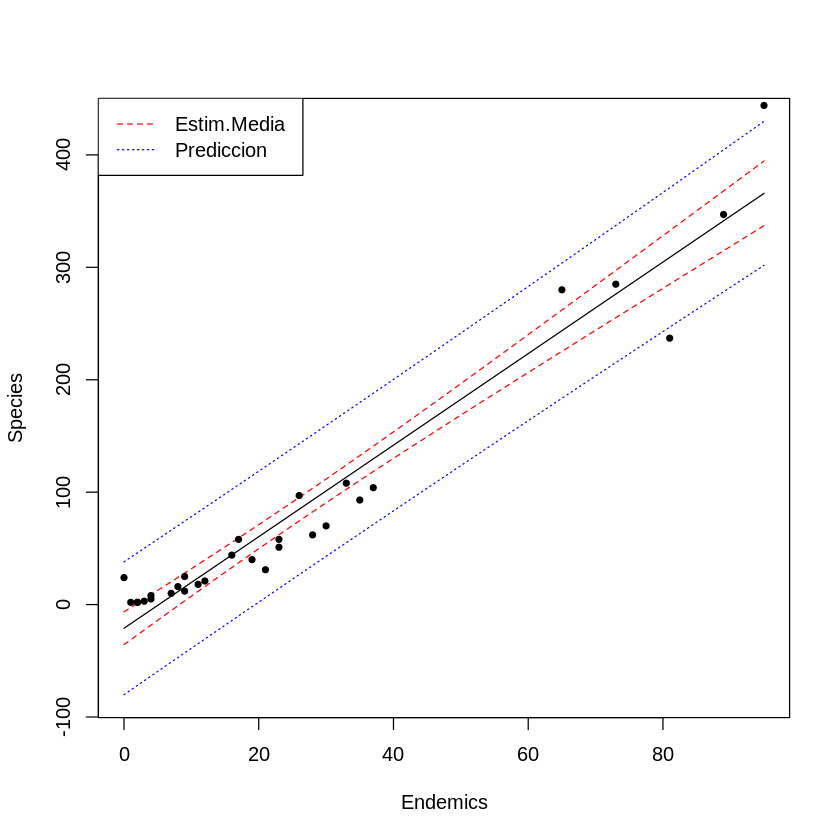

In [84]:
x0<-seq(min(gala$Endemics),max(gala$Endemics),length=30)
pred.m<-predict(fit,data.frame(Endemics=x0),interval="confidence",se.fit=T)
pred.p<-predict(fit,data.frame(Endemics=x0),interval="prediction",se.fit=T)

matplot(x0,cbind(pred.m$fit,pred.p$fit[,-1]),lty=c(1,2,2,3,3),
        col=c("black","red","red","blue","blue"),type="l",xlab="Endemics",
        ylab="Species")

legend('topleft',c("Estim.Media","Prediccion"),lty=c(2,3),
       col=c("red","blue"))

points(gala$Endemics,gala$Species, pch = 20)

Deben considerarse algunos aspectos de la sintaxis anterior:

La línea `x0<-seq(min(gala$Endemics),max(gala$Endemics),length=30)` presenta algunos argumentos clave en el cálculo de las nuevas medidas. En el caso particular del ejemplo, se trata de una secuencia que va del valor mínimo de la variable independiente (en este caso la denominada `Endemics`, al valor máximo de la misma y cuya longitud `length` es de 30 ya que la tabla original de datos tiene 30 observaciones.

Hay que recordar que, en este punto, se requiere plantear las respectivas pruebas de hipótesis para los parámetros $\beta$ del modelo. De manera general, se tiene:

$$
H_{0}: \beta_{k} = 0 \\
H_{1}: \beta_{k} \neq 0
$$

Se se establece un nivel de significancia $\alpha = 0.05$; se observa que $\beta_{0}$ y $\beta_{1}$ son significativos.

Otro elemento a evaluar es la varianza que es lo que, en verdad, permite determinar si la variación observada se debe a la regresión. La prueba de Análisis de la Varianza (ANOVA) tiene como base las hipótesis:

$$
H_{0}: \sigma^{2} = 0 \\
H_{1}: \sigma^{2} \neq 0
$$

que tiene su respectiva interpretación como se discutió en el curso. Para realizar el análisis de la varianza, una opción es:

In [85]:
aov.fit<-aov(fit)
summary(aov.fit)

            Df Sum Sq Mean Sq F value Pr(>F)    
Endemics     1 359208  359208   459.8 <2e-16 ***
Residuals   28  21874     781                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Ahora, se tiene evidencia que la regresión explica bien la variación observada en la variable dependiente (recuérdese lo discutido en el curso).

Para el diagnóstico del modelo es bueno realizar una inspección gráfica. El modelo estimado permite desarrollar un diagnóstico inicial en el cual se profundizará al momento de abordar el enfoque múltiple:

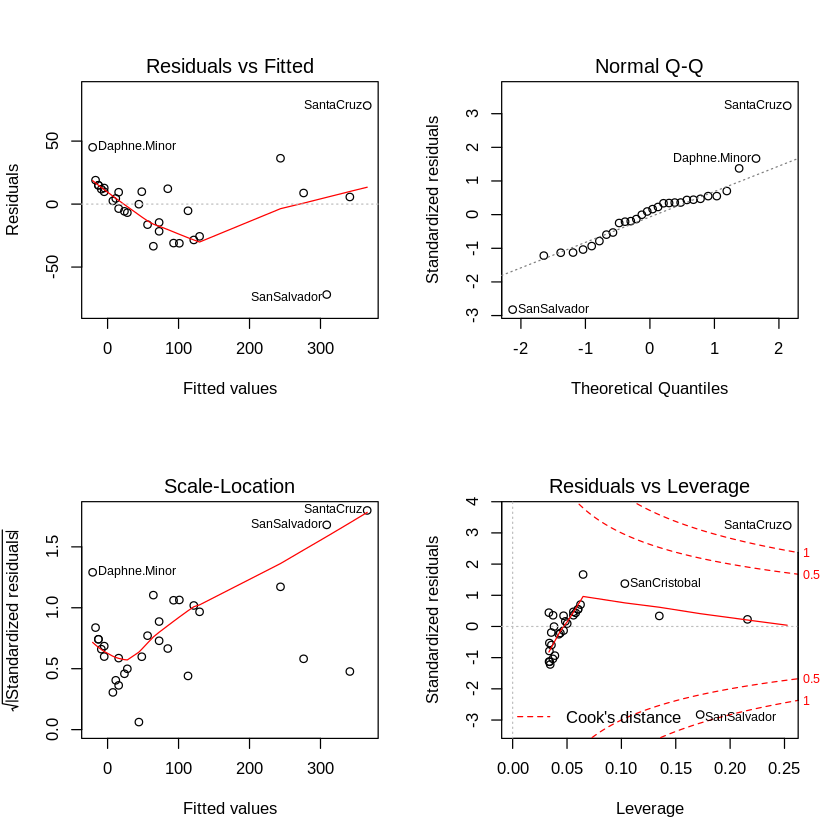

In [86]:
par(mfrow = c(2,2))
plot(fit)
par(mfrow = c(1,1))

Mediante esta salida es posible revisar parte del cumplimiento de los supuestos. Sin embargo, se requiere de la realización de las respectivs pruebas para concluir al respecto.

Para este análisis, se emplean los residuales. Así, los residuos $e(i)$ se obtienen:

In [88]:
e<-residuals(fit); as.data.frame(round(e,2)) # en esta última línea la orden round se refiere al redondeo de cifras significativas

,"round(e, 2)"
,<dbl>
Baltra,-14.61
Bartolome,-33.47
Caldwell,11.83
Champion,9.40
Coamano,18.98
Daphne.Major,-5.74
Daphne.Minor,45.05
Darwin,2.54
Eden,12.76


Y los residuos estandarizado con

In [91]:
summary(fit)


Call:
lm(formula = Species ~ Endemics, data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.791 -15.894   3.507  12.088  78.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.0480     7.1138  -2.959  0.00622 ** 
Endemics      4.0721     0.1899  21.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.95 on 28 degrees of freedom
Multiple R-squared:  0.9426,	Adjusted R-squared:  0.9406 
F-statistic: 459.8 on 1 and 28 DF,  p-value: < 2.2e-16


In [92]:
sfit<-summary(fit)
d<-e/sfit$sigma; as.data.frame(round(d,2))

,"round(d, 2)"
,<dbl>
Baltra,-0.52
Bartolome,-1.20
Caldwell,0.42
Champion,0.34
Coamano,0.68
Daphne.Major,-0.21
Daphne.Minor,1.61
Darwin,0.09
Eden,0.46


o bien con una función de la librería `MASS` llamada `stdres`

In [93]:
library(MASS)
stdres(fit)

Baltra    Bartolome     Caldwell     Champion      Coamano Daphne.Major 
 -0.53177348  -1.21856970   0.43614936   0.34445174   0.70115962  -0.21020323 
Daphne.Minor       Darwin         Eden      Enderby     Espanola   Fernandina 
  1.66662340   0.09337237   0.46983474   0.55003064   0.44300574  -1.03816182 
    Gardner1     Gardner2     Genovesa      Isabela     Marchena       Onslow 
  0.35815253   0.35936933  -0.59465507   0.22759764  -0.78656098   0.55003064 
       Pinta       Pinzon   Las.Plazas       Rabida SanCristobal  SanSalvador 
 -0.93492905  -0.19420441  -0.13195437  -1.13266215   1.37379959  -2.82354069 
   SantaCruz      SantaFe   SantaMaria      Seymour      Tortuga         Wolf 
  3.23603976  -1.12710174   0.33796361  -0.00384125   0.16400005  -0.24925467

Una aproximación gráfica de los residuos permite analizar los distintos supuestos. Como éstos parten de la consideración $e \sim N(0,\sigma^{2})$, es neceseario dedicarle un momento a revisar este aspecto.

En el primer gráfico, el histograma se contrasta con la forma de campana que sigue un distribución normal. La distribución de la densidad de los residuos estandarizados presenta un pequeño sesgo en relación con la campana de normalidad. 

El segundo gráfico es de residuos estandarizados versus el predictor. Este muestra poca linealidad en la distribución de los residuos pues se evidencia perturbación en los residuos a partir de cierta magnitud de la variable regresora.

El tercer gráfico es de la secuencia temporal de los residuos estandarizados y muestra poca reguralidad en su distribución. 

El último gráfico es el de residuos estandarizados rezagados y tiene una distribución bastante dispersa, por lo tanto, hay independencia entre los residuos.

La sintaxis para esto es:

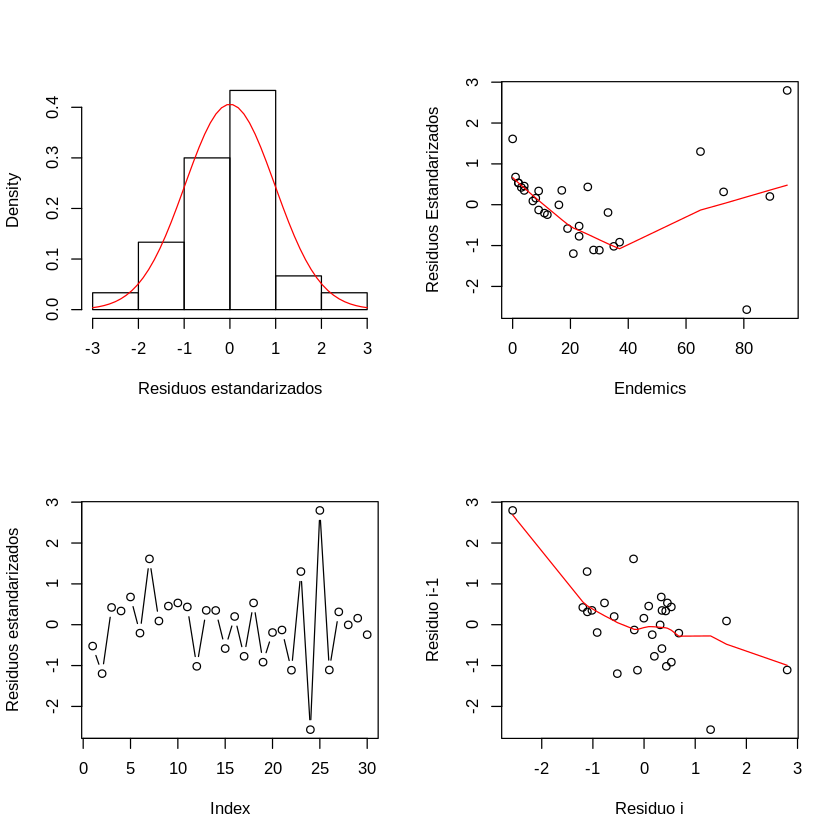

In [94]:
par(mfrow=c(2,2))
# el histograma de los residuos, superponiendo una densidad normal:
hist(d,probability=T,xlab="Residuos estandarizados",main="",
     xlim=c(-3,3))
d.seq<-seq(-3,3,length=50)
lines(d.seq,dnorm(d.seq,mean(d),sd(d)), col = 'red')

# El gráfico de residuos versus el predictor:
plot(gala$Endemics,d,xlab="Endemics",ylab="Residuos Estandarizados")

# y se ajusta con una curva suavizada la tendencia:
lines(lowess(gala$Endemics,d),col="red")

# La secuencia temporal de residuos se obtiene con:
plot(d,type="b",ylab="Residuos estandarizados")

# y el gráfico de residuos versus el anterior es:
n<-length(d)
plot(d[1:(n-1)],d[2:n],xlab="Residuo i",ylab="Residuo i-1")

# y se ajusta con una curva suavizada la tendencia:
lines(lowess(d[1:(n-1)],d[2:n]),col="red")

El gráfico _Normal Q-Q plot_ presenta los cuantiles de residuos de la muestra contra los cuantiles teóricos. La línea de normalidad hace referencia a cómo se deberían comportar los residuos en caso que siguieran una distribución normal. Estos se alejan lo suficiente de la línea teórica para suponer que hay heterocedasticidad. Además, la gráfica muestra algunos datos atípicos que pueden producir bastante ruido en el modelo.

El _Boxplot_ de los residuos (no estandarizados) deja en manifiesto la dispersión de los datos y la presencia de valores atípicos. Se completa la exploración con el boxplot _con outliers_ para la variable dependiente y, luego, la gráfica _sin outliers_. 

In [76]:
install.packages('outliers')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 444

[1] 347 280 237 444 285

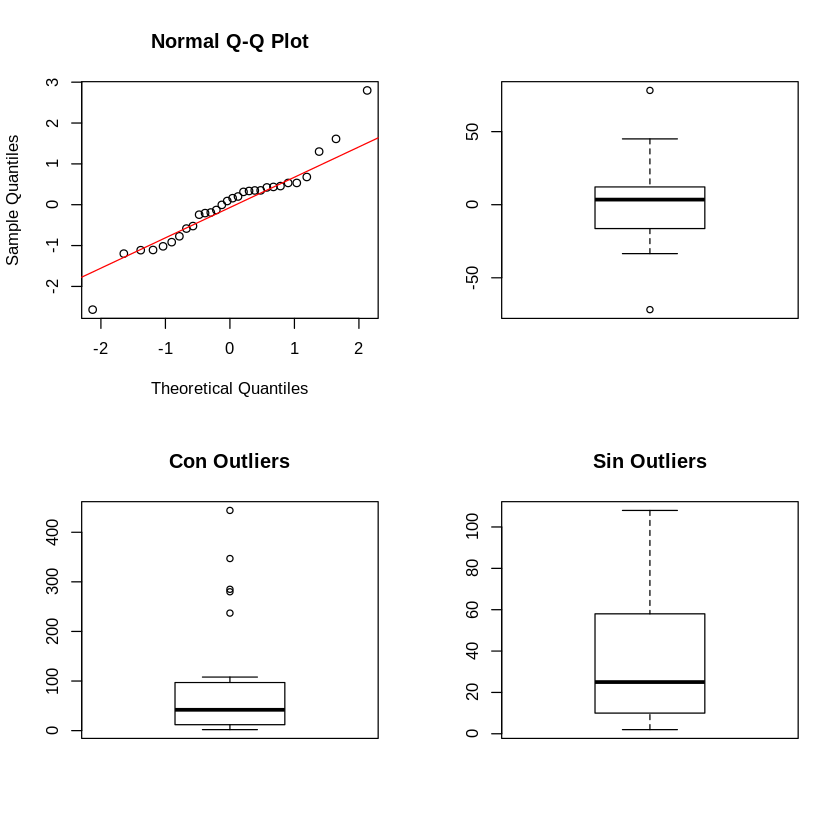

In [95]:
par(mfrow=c(2,2))

# Datos Atípicos:
# Conseguir los gr¶aficos qqplot de normalidad con los comandos:
qqnorm(d)
qqline(d, col = 'red')
boxplot(e)

library(outliers)

outlier(gala$Species)
boxplot(gala$Species, main = 'Con Outliers')$out


outliers <- boxplot(gala$Species, plot=FALSE)$out
gala.no.out <- gala[-which(gala$Species %in% outliers),]

boxplot(gala.no.out$Species, main = 'Sin Outliers')

Los intervalos de confianza de los parámetros son:

In [96]:
ic.ind<-confint(fit,level=0.95);ic.ind

,2.5 %,97.5 %
(Intercept),-35.61993,-6.476108
Endemics,3.68309,4.461075


In [97]:
alpha <- 0.05
estim<-fit$coefficients
error<-sfit$coefficients[,2]
p<-length(estim)
t.alpha<-qt(1-alpha/(2*p),df.residual(fit))
ic.bonf4<-cbind(inf=estim-t.alpha*error,sup=estim+t.alpha*error)
ic.bonf4


,inf,sup
(Intercept),-37.896653,-4.199383
Endemics,3.622313,4.521851


In [98]:
alpha<-0.05
t.alpha<-qt(1-alpha/(2),df.residual(fit))
ic.bonf2<-cbind(inf=estim-t.alpha*error,sup=estim+t.alpha*error)
ic.bonf2

,inf,sup
(Intercept),-35.61993,-6.476108
Endemics,3.68309,4.461075


La gráfica del modelo versus la variable predictora:



La comprobación de los supuestos requiere de exploración gráfica y de implementación de pruebas estadísticas. Cada supuesto tiene su respectiva forma de revisión. El primer supuesto para abordar es el de linealidad. Para ello se puede emplear la gráfica de la variable independiente vs. los residuos parciales. Puede emplearse la función `prplot`:

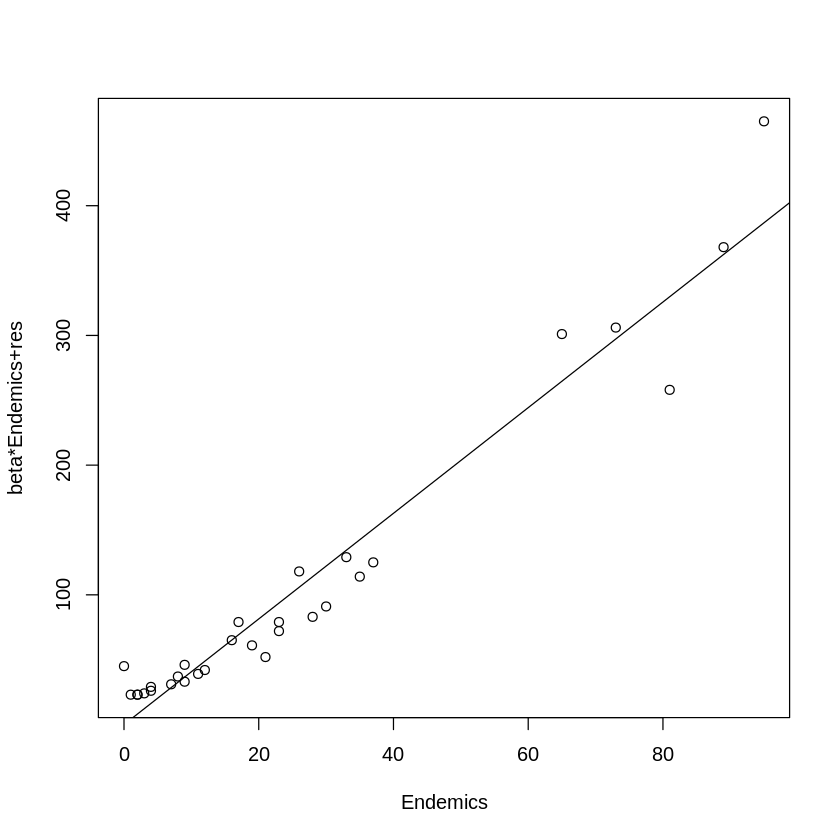

In [99]:
# Usando Residuos Parciales
prplot(fit,1)

Algo a considerar al momento de implementar las pruebas para comprobación de supuestos es que, en las pruebas de hipótesis respectivas, la hipótesis nula se plantea en función del cumplimiento del supuesto. Por ejemplo, para el supuesto de homocedasticidad:

$$
H_{0} : \text{El modelo es Homocedástico}\\
H_{1} : \text{El modelo es Heterocedástico}
$$

El supuesto de homocedasticidad se puede verificar primero con la exploración gráfica:

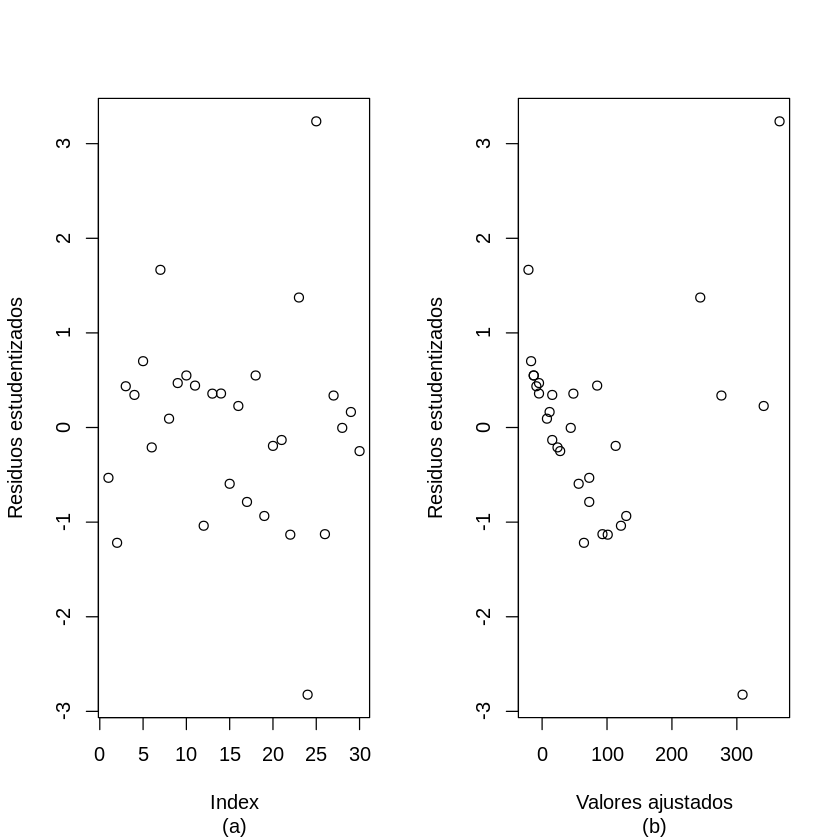

In [100]:
r<-rstandard(fit)
opar<-par(mfrow=c(1,2))
# los residuos solos
plot(r,ylab='Residuos estudentizados')
title(sub="(a)")
# los residuos versus los valores ajustados
plot(fitted(fit),r,xlab='Valores ajustados',
     ylab='Residuos estudentizados')
title(sub="(b)")
par(opar)

Matemáticamente, hay varias pruebas para la comprobación del supuesto, una de ellas es el test de _Breusch-Pagan_ que se puede implementar usando la función `bptest` de la librería `lmtest`:

In [77]:
install.packages('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [101]:
library(lmtest)
# El test de Breusch-Pagan se obtiene con
bptest(fit)


	studentized Breusch-Pagan test

data:  fit
BP = 11.09, df = 1, p-value = 0.0008679


El supuesto de normalidad se ha explorado anteriormente. Cabe recordar, entonces, que las gráficas recomendadas (aunque no las únicas) son el histograma y el gráfico de cuantiles (_QQ-Plot_):

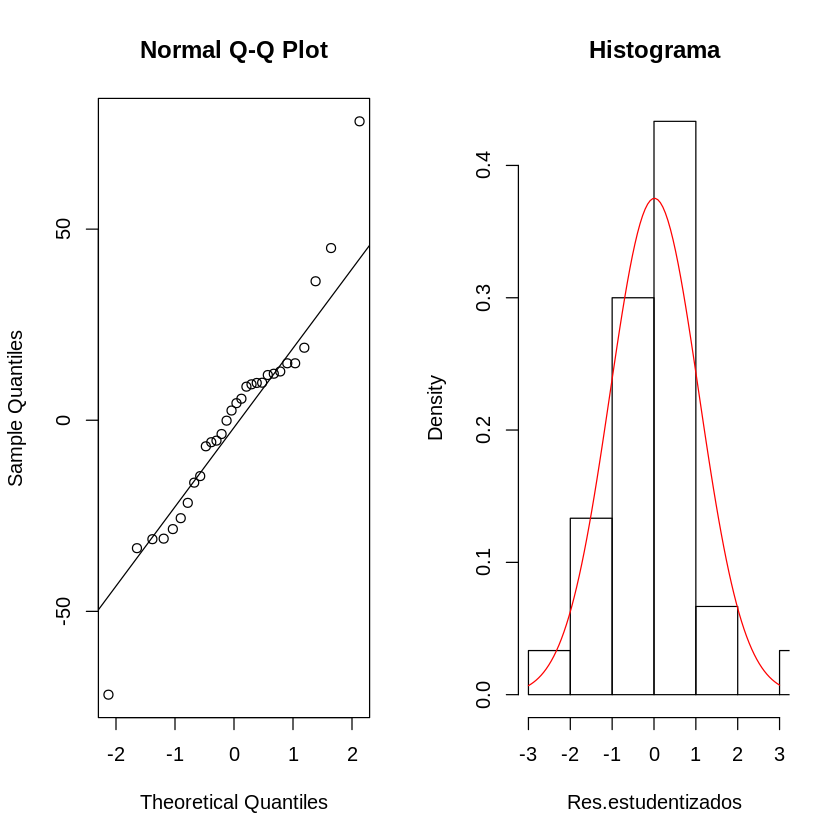

In [102]:
opar<-par(mfrow=c(1,2))
# Los gráficos de normalidad para los residuos son
qqnorm(fit$resid)
qqline(fit$resid)
# Eln histograma y superponer una densidad normal para los residuos estandarizados o estudentizados
r<-rstandard(fit)
hist(r,prob=T,xlim=c(-3,3),xlab="Res.estudentizados",main="Histograma")
lines(xseq<-seq(-3,3,length=100), dnorm(xseq,mean(r),sd(r)),
      col = 'red')
par(opar)

In [104]:
# Y pextraer información sobre el reparto de los residuos estudentizados por debajo de -2 y encima de 2
summary(rstandard(fit))
round(quantile(rstandard(fit),prob=c(0.025,0.975)),2)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.82354 -0.57893  0.12869  0.01114  0.44129  3.23604 

2.5% 97.5% 
-1.66  2.10

Como todo supuesto, hay varias pruebas. Aquí se presentan dos de las más empleadas: _Shapiro-Wilks_ que se obtiene con la orden `shapiro.test` y _Kolmogorov-Smirnov_ para la cual se usa la orden `ks.test`; ambas de la librería `lmtest`.

In [105]:
# Shapiro-Wilks:
shapiro.test(r)


	Shapiro-Wilk normality test

data:  r
W = 0.9268, p-value = 0.04041


In [106]:
# Kolmogorov-Smirnov:
ks.test(r,pnorm)


	One-sample Kolmogorov-Smirnov test

data:  r
D = 0.15782, p-value = 0.4019
alternative hypothesis: two-sided


In [108]:
dwtest(fit)


	Durbin-Watson test

data:  fit
DW = 3.1665, p-value = 0.9998
alternative hypothesis: true autocorrelation is greater than 0


Veamos el planteamiento ahora del modelo multivariado. La única diferencia que se da está en la forma funcional que, como ya vimos, posee más de una variable:

$$
\bf{Y} = \bf{X} \beta + \epsilon
$$

Empecemos por lo intuitivo: organizar el modelo con todas la variables disponibles. Veamos el resultado:

In [109]:
fitm <- lm(Species ~ Endemics + Area + Elevation +	Nearest +	Scruz +	Adjacent, data = gala)
summary(fitm)


Call:
lm(formula = Species ~ Endemics + Area + Elevation + Nearest + 
    Scruz + Adjacent, data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.219 -10.225   1.830   9.557  71.090 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.337942   9.423550  -1.628    0.117    
Endemics      4.393654   0.481203   9.131 4.13e-09 ***
Area          0.013258   0.011403   1.163    0.257    
Elevation    -0.047537   0.047596  -0.999    0.328    
Nearest      -0.101460   0.500871  -0.203    0.841    
Scruz         0.008256   0.105884   0.078    0.939    
Adjacent      0.001811   0.011879   0.152    0.880    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.96 on 23 degrees of freedom
Multiple R-squared:  0.9494,	Adjusted R-squared:  0.9362 
F-statistic: 71.88 on 6 and 23 DF,  p-value: 9.674e-14


La evidencia nos indica que la variable `Endemics` es la única que aporta. Sin embargo, es necesario descartar que las otras variables en verdad no definan el modelo. Previamente habíamos explorado la correlación. Recordemos los resultados:

In [110]:
round(cor(gala),3)

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
Species,1.000,0.971,0.618,0.738,-0.014,-0.171,0.026
Endemics,0.971,1.000,0.617,0.793,0.006,-0.154,0.083
Area,0.618,0.617,1.000,0.754,-0.111,-0.101,0.180
Elevation,0.738,0.793,0.754,1.000,-0.011,-0.015,0.536
Nearest,-0.014,0.006,-0.111,-0.011,1.000,0.615,-0.116
Scruz,-0.171,-0.154,-0.101,-0.015,0.615,1.000,0.052
Adjacent,0.026,0.083,0.180,0.536,-0.116,0.052,1.000


Nuestro interés se centra en la primera fila ya que la variable dependiente es `Species`, allí vemos que hay variables que aparentemente no están correlacionadas por lo que necesitamos evaluar la correlación. Vamos a hacerlo haciendo la prueba de momentos de Pearson mediante la función `cor.test`:

In [111]:
with(gala, cor.test(Species,Endemics))


	Pearson's product-moment correlation

data:  Species and Endemics
t = 21.443, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9390736 0.9861968
sample estimates:
      cor 
0.9708765 


Vamos a hacerlo, ahora para todas las variables usando la función `rcorr` de la librería `Hmisc`:

In [112]:
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [113]:
library("Hmisc")

In [114]:
rcorr(as.matrix(gala))

          Species Endemics  Area Elevation Nearest Scruz Adjacent
Species      1.00     0.97  0.62      0.74   -0.01 -0.17     0.03
Endemics     0.97     1.00  0.62      0.79    0.01 -0.15     0.08
Area         0.62     0.62  1.00      0.75   -0.11 -0.10     0.18
Elevation    0.74     0.79  0.75      1.00   -0.01 -0.02     0.54
Nearest     -0.01     0.01 -0.11     -0.01    1.00  0.62    -0.12
Scruz       -0.17    -0.15 -0.10     -0.02    0.62  1.00     0.05
Adjacent     0.03     0.08  0.18      0.54   -0.12  0.05     1.00

n= 30 


P
          Species Endemics Area   Elevation Nearest Scruz  Adjacent
Species           0.0000   0.0003 0.0000    0.9411  0.3659 0.8908  
Endemics  0.0000           0.0003 0.0000    0.9749  0.4157 0.6641  
Area      0.0003  0.0003          0.0000    0.5589  0.5962 0.3411  
Elevation 0.0000  0.0000   0.0000           0.9537  0.9355 0.0022  
Nearest   0.9411  0.9749   0.5589 0.9537            0.0003 0.5407  
Scruz     0.3659  0.4157   0.5962 0.9355    0.0003  

Con el test de correlación simple ya tenemos una mejor idea de cómo deberíamos plantar el modelo. Los resultados nos sugieren que deberíamos emplear como covariables, además de `Endemics`, las variables `Area` y `Elevation`. Veamos el modelo:

In [115]:
fitm2 <- lm(Species ~ Endemics + Area + Elevation, data = gala)
summary(fitm2)


Call:
lm(formula = Species ~ Endemics + Area + Elevation, data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.691 -10.530   2.387  10.529  72.723 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.891237   7.569210  -2.099   0.0456 *  
Endemics      4.331791   0.304686  14.217 8.97e-14 ***
Area          0.012669   0.008936   1.418   0.1681    
Elevation    -0.041439   0.023653  -1.752   0.0916 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.29 on 26 degrees of freedom
Multiple R-squared:  0.9492,	Adjusted R-squared:  0.9433 
F-statistic: 161.8 on 3 and 26 DF,  p-value: < 2.2e-16


La significancia de los parámetros dependerá de varios aspectos. Por ejemplo, como estamos trabajando sólo con 30 datos, podemos pensar en usar un $10\%$ de significancia en lugar del tradicional $5\%$.

`R` nos permite hacer una selección sistemática del modelo mediante la función `step` que compara las diferentes combinacionesde variables a partir de una medida llamada *criterio de Información de Akaike* que se define como:

$$
AIC = - 2*ln(\hat{\beta}) + 2 p
$$

Si se incluye el número de datos se puede obtener un criterio más preciso, éste criterio se denomina *Criterio de Información Bayesiana* y se denota:

$$
BIC = - 2*ln(\hat{\beta}) + ln(n) p
$$

Las diferencias, en realidad, son mínimas, y valores pequeños en ambos criterios indican mejores modelos. Veamos, entonces, la función `step`:

In [116]:
step(fitm)

Start:  AIC=207.99
Species ~ Endemics + Area + Elevation + Nearest + Scruz + Adjacent

            Df Sum of Sq   RSS    AIC
- Scruz      1         5 19300 206.00
- Adjacent   1        19 19314 206.02
- Nearest    1        34 19329 206.04
- Elevation  1       837 20132 207.26
- Area       1      1134 20429 207.71
<none>                   19295 207.99
- Endemics   1     69937 89231 251.93

Step:  AIC=206
Species ~ Endemics + Area + Elevation + Nearest + Adjacent

            Df Sum of Sq   RSS    AIC
- Adjacent   1        19 19318 204.03
- Nearest    1        32 19332 204.05
- Elevation  1       838 20138 205.28
- Area       1      1129 20429 205.71
<none>                   19300 206.00
- Endemics   1     74567 93867 251.45

Step:  AIC=204.03
Species ~ Endemics + Area + Elevation + Nearest

            Df Sum of Sq    RSS    AIC
- Nearest    1        50  19369 202.11
<none>                    19318 204.03
- Area       1      1376  20694 204.09
- Elevation  1      2232  21550 205.31
- En


Call:
lm(formula = Species ~ Endemics + Area + Elevation, data = gala)

Coefficients:
(Intercept)     Endemics         Area    Elevation  
  -15.89124      4.33179      0.01267     -0.04144  


Según lo indica la función, las covariales deberían ser: `Endemics`, `Area` y `Elevation`, tal como lo definimos en el segundo modelo. Comparemos los modelos mediante `AIC` y `BIC`:

In [117]:
AIC(fitm,fitm2)

,df,AIC
,<dbl>,<dbl>
fitm,8,295.128
fitm2,5,289.243


In [118]:
BIC(fitm,fitm2)

,df,BIC
,<dbl>,<dbl>
fitm,8,306.3376
fitm2,5,296.2490


Seleccionado el modelo, hagamos un análisis gráfico inicial.

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


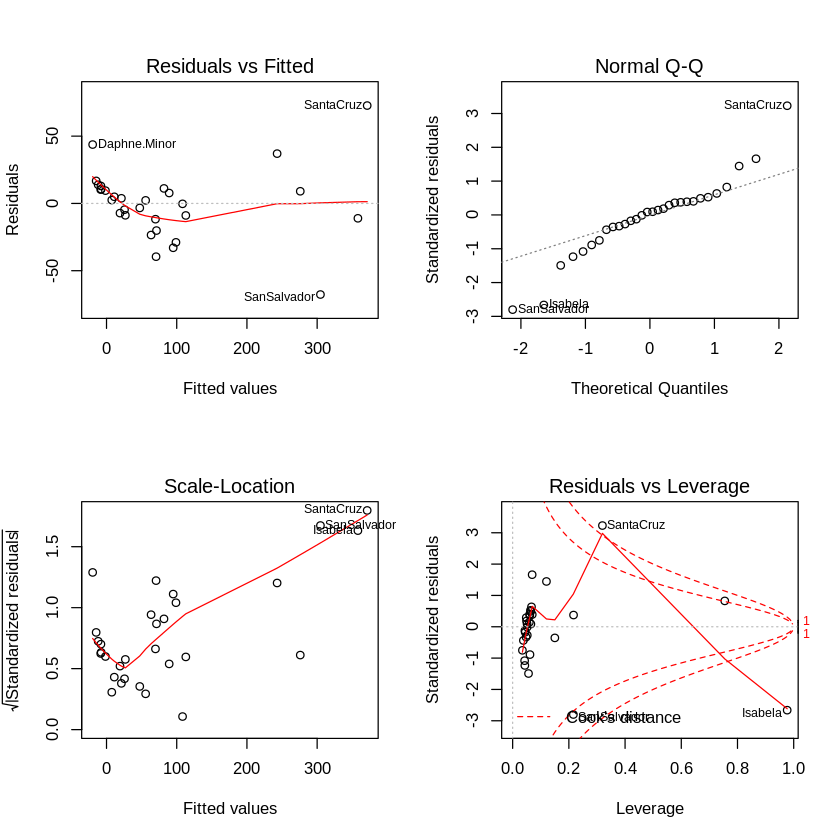

In [119]:
par(mfrow = c(2,2))
plot(fitm2)
par(mfrow = c(1,1))

Es posible que algunos supuestos no se cumplan, veamos las pruebas

In [120]:
# Homocedasticidad
bptest(fitm2)


	studentized Breusch-Pagan test

data:  fitm2
BP = 14.265, df = 3, p-value = 0.002566


In [121]:
# Icorrelacion
dwtest(fitm2)


	Durbin-Watson test

data:  fitm2
DW = 3.1321, p-value = 0.9998
alternative hypothesis: true autocorrelation is greater than 0


In [122]:
# Normalidad
# Shapiro-Wilks:
shapiro.test(residuals(fitm2))


	Shapiro-Wilk normality test

data:  residuals(fitm2)
W = 0.94372, p-value = 0.1146


Como resultado, tenemos un modelo Heterocedástico, esto puede deberse a la presencia de valores atípicos, podemos excluir esos valores y ver que pasa con el modelo para determinar si se correge el incumplimiento del supuesto. Como y habíamos creado un objeto sin outliers veamos cómo quedaría el modelo

In [123]:
fitm3 <- lm(Species ~ Endemics + Area + Elevation, data = gala.no.out)
summary(fitm3)


Call:
lm(formula = Species ~ Endemics + Area + Elevation, data = gala.no.out)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.793  -8.378  -2.070   3.323  29.680 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.758398   4.502897  -0.835    0.413    
Endemics     2.709117   0.334534   8.098 6.77e-08 ***
Area        -0.009947   0.048855  -0.204    0.841    
Elevation    0.006166   0.024327   0.253    0.802    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.89 on 21 degrees of freedom
Multiple R-squared:  0.8775,	Adjusted R-squared:   0.86 
F-statistic: 50.16 on 3 and 21 DF,  p-value: 9.474e-10


Como se observa, el modelo cambia. Esto podría significar que deberíamos replantear el análisis y empezar quitando los datos atípicos antes de diseñar el modelo

In [124]:
step(lm(Species ~ ., data = gala.no.out))

Start:  AIC=132.2
Species ~ Endemics + Area + Elevation + Nearest + Scruz + Adjacent

            Df Sum of Sq     RSS    AIC
- Elevation  1      31.8  2858.9 130.48
- Scruz      1      39.5  2866.6 130.55
- Area       1     140.9  2968.1 131.42
<none>                    2827.1 132.20
- Adjacent   1     378.4  3205.5 133.34
- Nearest    1     383.7  3210.9 133.38
- Endemics   1    9396.9 12224.0 166.81

Step:  AIC=130.48
Species ~ Endemics + Area + Nearest + Scruz + Adjacent

           Df Sum of Sq     RSS    AIC
- Scruz     1      53.0  2911.9 128.94
<none>                   2858.9 130.48
- Area      1     271.9  3130.8 130.75
- Adjacent  1     358.8  3217.8 131.44
- Nearest   1     389.1  3248.0 131.67
- Endemics  1   17306.4 20165.3 177.32

Step:  AIC=128.94
Species ~ Endemics + Area + Nearest + Adjacent

           Df Sum of Sq     RSS    AIC
<none>                   2911.9 128.94
- Area      1     300.7  3212.5 129.40
- Adjacent  1     360.7  3272.6 129.86
- Nearest   1     407.9


Call:
lm(formula = Species ~ Endemics + Area + Nearest + Adjacent, 
    data = gala.no.out)

Coefficients:
(Intercept)     Endemics         Area      Nearest     Adjacent  
   -0.12208      2.77734      0.09009     -0.33224     -0.01293  


In [125]:
fitm4 <- lm(Species ~ Endemics + Area + Nearest + Adjacent, data = gala.no.out)
summary(fitm4)


Call:
lm(formula = Species ~ Endemics + Area + Nearest + Adjacent, 
    data = gala.no.out)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.712  -4.774  -2.336   3.213  26.113 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.122080   4.426343  -0.028    0.978    
Endemics     2.777336   0.249394  11.136 5.03e-10 ***
Area         0.090088   0.062688   1.437    0.166    
Nearest     -0.332240   0.198485  -1.674    0.110    
Adjacent    -0.012934   0.008217  -1.574    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.07 on 20 degrees of freedom
Multiple R-squared:  0.8979,	Adjusted R-squared:  0.8774 
F-statistic: 43.96 on 4 and 20 DF,  p-value: 1.232e-09


In [126]:
AIC(fitm3, fitm4)

,df,AIC
,<dbl>,<dbl>
fitm3,5,204.4295
fitm4,6,201.8888


Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


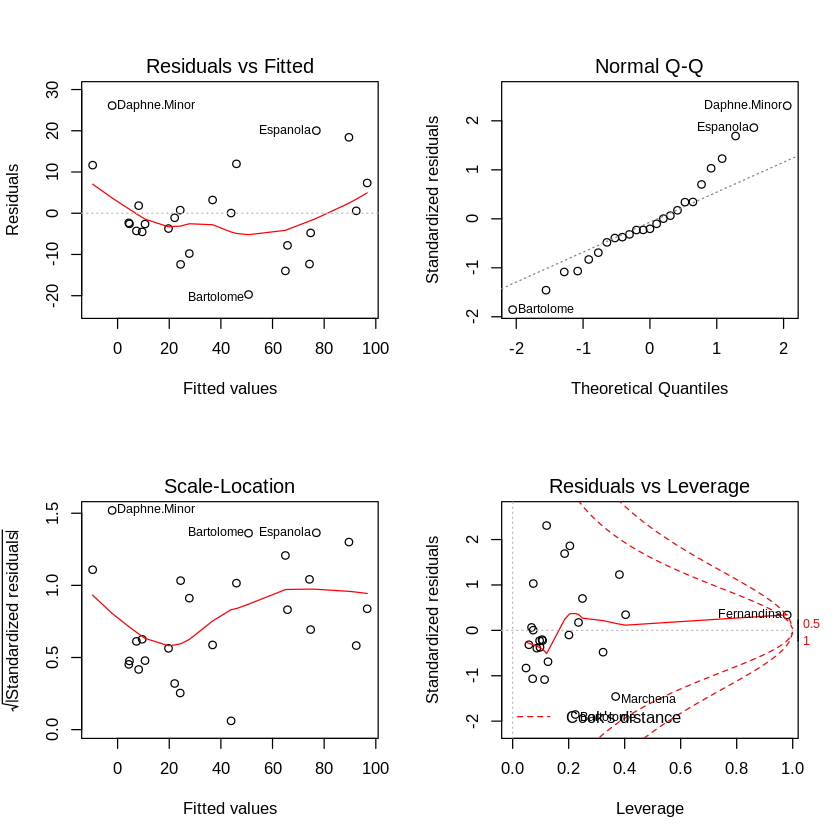

In [128]:
par(mfrow = c(2,2))
plot(fitm4)

Ahora, las pruebas de los supuestos del modelo

In [129]:
# Homocedasticidad
bptest(fitm4)


	studentized Breusch-Pagan test

data:  fitm4
BP = 2.0833, df = 4, p-value = 0.7204


In [130]:
# Icorrelacion
dwtest(fitm4)


	Durbin-Watson test

data:  fitm4
DW = 2.1016, p-value = 0.5827
alternative hypothesis: true autocorrelation is greater than 0


In [131]:
# Normalidad
# Shapiro-Wilks:
shapiro.test(residuals(fitm4))


	Shapiro-Wilk normality test

data:  residuals(fitm4)
W = 0.9517, p-value = 0.2738


Finalmente, el modelo es el denominado `fitm4` cuyos coeficientes son

In [132]:
sumary(fitm4)

              Estimate Std. Error t value  Pr(>|t|)
(Intercept) -0.1220800  4.4263431 -0.0276    0.9783
Endemics     2.7773360  0.2493944 11.1363 5.029e-10
Area         0.0900876  0.0626883  1.4371    0.1662
Nearest     -0.3322403  0.1984851 -1.6739    0.1097
Adjacent    -0.0129336  0.0082171 -1.5740    0.1312

n = 25, p = 5, Residual SE = 12.06622, R-Squared = 0.9


In [133]:
# Y la ANOVA
summary(aov(fitm4))

            Df Sum Sq Mean Sq F value   Pr(>F)    
Endemics     1  25009   25009 171.775 2.82e-11 ***
Area         1      0       0   0.002    0.966    
Nearest      1    230     230   1.579    0.223    
Adjacent     1    361     361   2.477    0.131    
Residuals   20   2912     146                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [134]:
fitm5 <- lm(Species ~ Endemics, data = gala.no.out)
summary(fitm5)


Call:
lm(formula = Species ~ Endemics, data = gala.no.out)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.620  -8.931  -1.779   3.225  28.536 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.5275     4.1083  -0.859    0.399    
Endemics      2.7689     0.2161  12.815 5.89e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.34 on 23 degrees of freedom
Multiple R-squared:  0.8771,	Adjusted R-squared:  0.8718 
F-statistic: 164.2 on 1 and 23 DF,  p-value: 5.893e-12


In [136]:
bptest(fitm5)


	studentized Breusch-Pagan test

data:  fitm5
BP = 0.71289, df = 1, p-value = 0.3985


In [137]:
shapiro.test(residuals(fitm5))


	Shapiro-Wilk normality test

data:  residuals(fitm5)
W = 0.90015, p-value = 0.01849


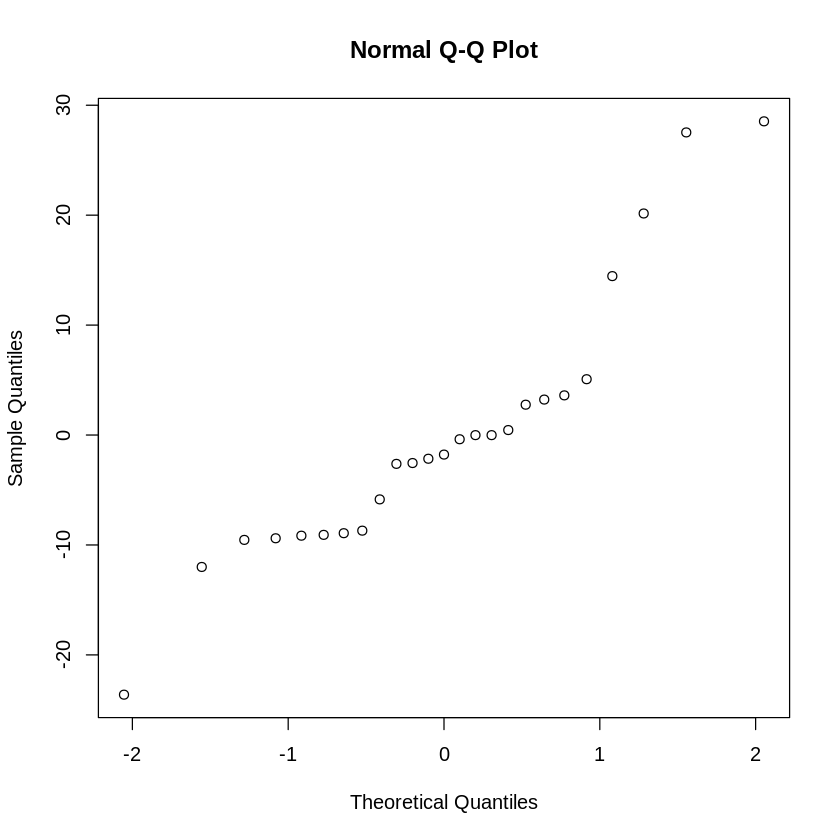

In [140]:
qqnorm(residuals(fitm5))